In [1]:
#import packages
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#retireve clean dataset
df = (r'C:\Users\abrah\Documents\Data analysis projects\Credit Card defaults\finaldatasetUCI_Credit_Card.csv')
pd.read_csv(df)
df2= pd.read_csv(df)
df2.shape

(30000, 26)

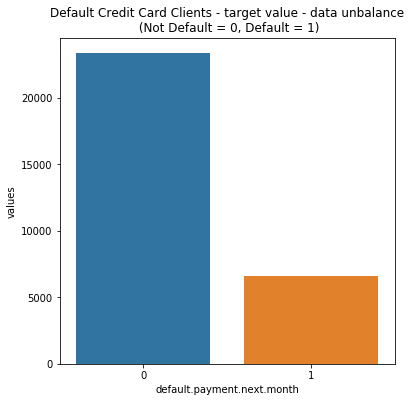

In [3]:
#DATA EXPLORATION
#check for balance
temp = df2["default.payment.next.month"].value_counts()
ddf = pd.DataFrame({'default.payment.next.month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Not Default = 0, Default = 1)')
sns.set_color_codes("bright")
sns.barplot(x = 'default.payment.next.month', y="values", data=ddf)
locs, labels = plt.xticks()
plt.show()

In [4]:
#The number of people not defaulting is significantly higher than those that defaults

In [6]:
print(df2.columns)

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


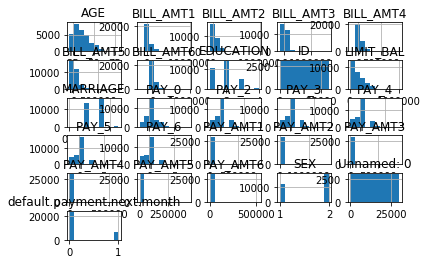

In [7]:
# Histogram
df2.hist()
plt.show()

In [8]:
#The majority of the attributes skewed right. There are no normal distribution

C:\Users\abrah\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


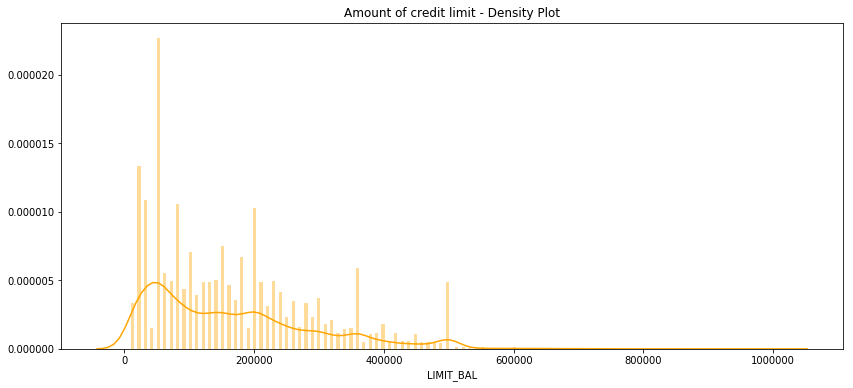

In [9]:
#amount of credit limit
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("bright")
sns.distplot(df2['LIMIT_BAL'],kde=True,bins=200, color="orange")
plt.show()

In [10]:
df2['LIMIT_BAL'].value_counts().shape

(81,)

In [11]:
df2['LIMIT_BAL'].value_counts().head(5)

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: LIMIT_BAL, dtype: int64

In [12]:
# As seen from the amount of credit limit, largest number of credit cards are with limit of 50,000 (3365), followed by 20,000 (1976).

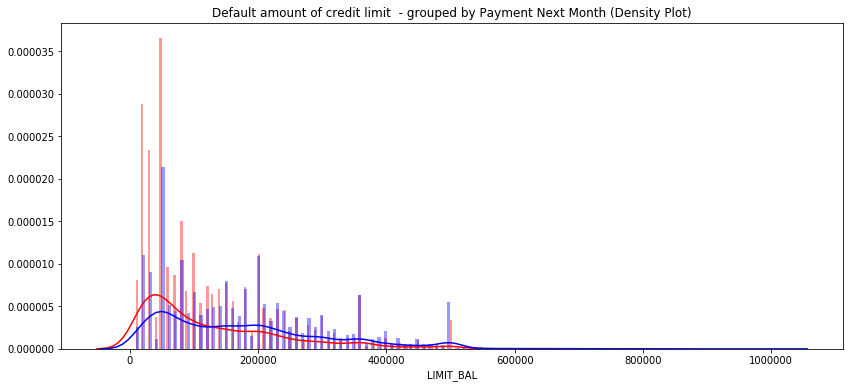

In [13]:
#amount of credit limit grouped by default payment next month
class_0 = df2.loc[df2['default.payment.next.month'] == 0]["LIMIT_BAL"]
class_1 = df2.loc[df2['default.payment.next.month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("bright")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="blue")
plt.show()

In [14]:
#Largest defaults number are for the amounts of 50,000, 20,000 and 30,000.

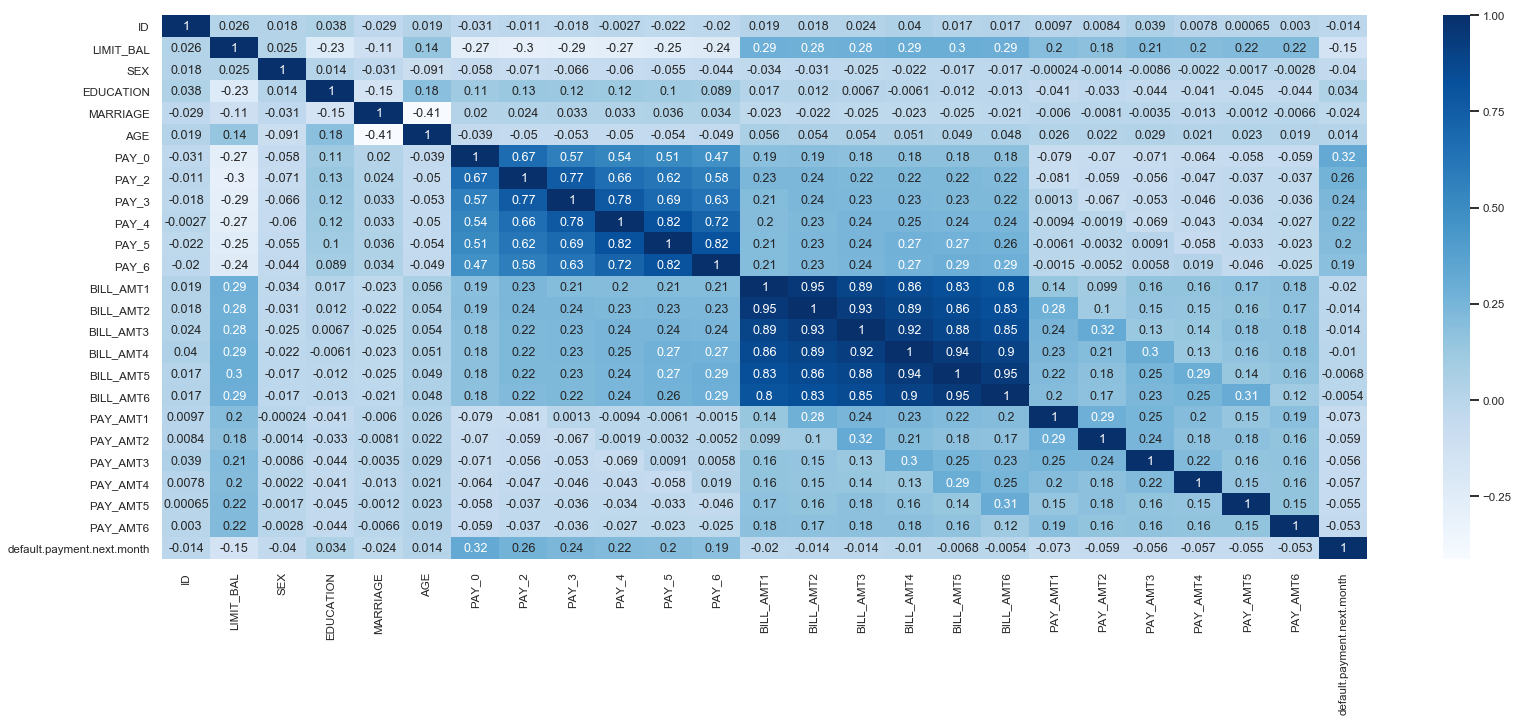

In [16]:
#SNS heatmap
sns.set(rc={'figure.figsize':(27,10)})
sns.set_context("talk", font_scale=0.7)
sns.heatmap(df2.iloc[:,1:].corr(), cmap='Blues', annot=True)
plt.show()

In [19]:
#From the heatmap, we can see that-
#LIMIT BAL has the lowest negative correlation at -0.15, indicating that the higher the credit limit, the lower the chances of default
#PAY_1 has the highest positive correlation at 0.32, showing that the longer the period of delayed payment, the higher the chances of default.
#PAY_1, PAY_2, PAY_3, PAY_4, PAY_5 and PAY_6 all have positive correlation to default.

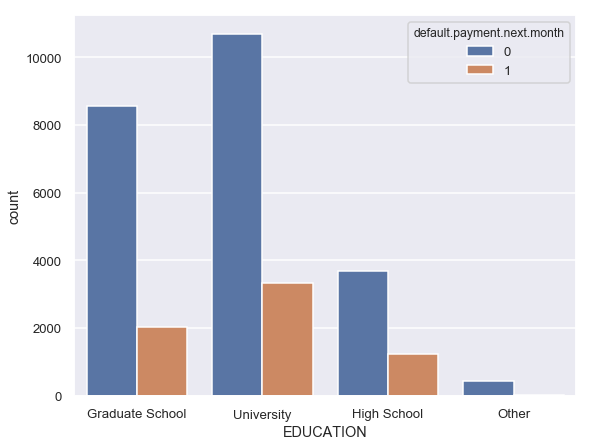

In [23]:
#EDUCATION vs DEFAULT
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

edu = sns.countplot(x='EDUCATION', hue='default.payment.next.month', data=df2)
edu.set_xticklabels(['Graduate School','University','High School','Other'])
plt.show()

In [24]:
default0 = df2.groupby(df2['EDUCATION'][df2['default.payment.next.month'] == 0]).size().reset_index(name='NOT_DEFAULT')
default1 = df2.groupby(df2['EDUCATION'][df2['default.payment.next.month'] == 1]).size().reset_index(name='DEFAULT')
total = df2.groupby('EDUCATION').size().reset_index(name='TOTAL')
eduTable = default0.join(default1['DEFAULT']).join(total['TOTAL'])
eduTable['EDUCATION'] = ['Graduate School','University','High School','Other']

eduTable

,EDUCATION,NOT_DEFAULT,DEFAULT,TOTAL
0,Graduate School,8549,2036,10585
1,University,10700,3330,14030
2,High School,3680,1237,4917
3,Other,435,33,468


In [25]:
eduTable['NOT_DEFAULT'] = round((default0['NOT_DEFAULT']/total['TOTAL'])*100,2)
eduTable['DEFAULT'] = round((default1['DEFAULT']/total['TOTAL'])*100,2)

eduPct = eduTable.iloc[:,0:3]
eduPct = eduPct.rename(columns={'NOT_DEFAULT': 'NOT_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})

eduPct

,EDUCATION,NOT_DEFAULT(%),DEFAULT(%)
0,Graduate School,80.77,19.23
1,University,76.27,23.73
2,High School,74.84,25.16
3,Other,92.95,7.05


In [26]:
#As seen from the table above, Default rates are higher for credit card users with a high school education and a university education. It seems that the higher the level of education, the lower the rate of default.

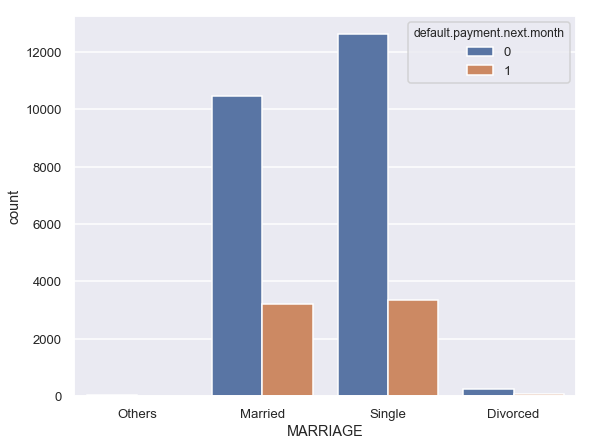

In [27]:
#MARRIAGE vs DEFAULT
sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

ma = sns.countplot(x='MARRIAGE', hue='default.payment.next.month', data=df2)
ma.set_xticklabels(['Others','Married','Single','Divorced'])
plt.show()

In [28]:
default2 = df2.groupby(df2['MARRIAGE'][df2['default.payment.next.month'] == 0]).size().reset_index(name='NOT_DEFAULT')
default3 = df2.groupby(df2['MARRIAGE'][df2['default.payment.next.month'] == 1]).size().reset_index(name='DEFAULT')
total2 = df2.groupby('MARRIAGE').size().reset_index(name='TOTAL')
maTable = default2.join(default3['DEFAULT']).join(total2['TOTAL'])
maTable['MARRIAGE'] = ['Others','Married','Single','Divorced']
maTable

,MARRIAGE,NOT_DEFAULT,DEFAULT,TOTAL
0,Others,49,5,54
1,Married,10453,3206,13659
2,Single,12623,3341,15964
3,Divorced,239,84,323


In [29]:
maTable['NOT_DEFAULT'] = round((default2['NOT_DEFAULT']/total2['TOTAL'])*100,2)
maTable['DEFAULT'] = round((default3['DEFAULT']/total2['TOTAL'])*100,2)

maPct = maTable.iloc[:,0:3]
maPct = maPct.rename(columns={'NOT_DEFAULT': 'NOT_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})

maPct

,MARRIAGE,NOT_DEFAULT(%),DEFAULT(%)
0,Others,90.74,9.26
1,Married,76.53,23.47
2,Single,79.07,20.93
3,Divorced,73.99,26.01


In [30]:
#As seen from the table above, Default rates are higher for people who are divorced followed by people who are married

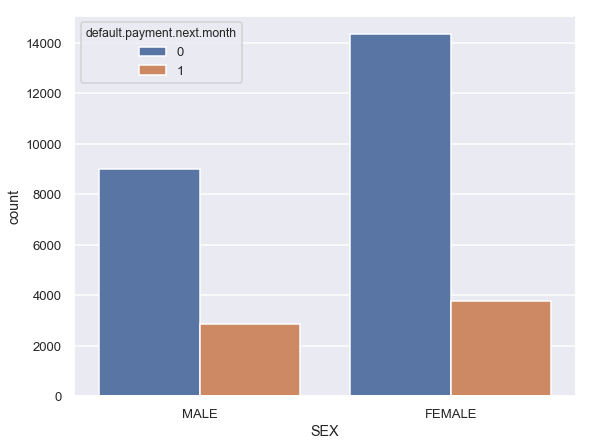

In [31]:
#SEX vs DEFAULT

sns.set(rc={'figure.figsize':(9,7)})
sns.set_context("talk", font_scale=0.8)

sx = sns.countplot(x='SEX', hue='default.payment.next.month', data=df2)
sx.set_xticklabels(['MALE','FEMALE'])
plt.show()

In [32]:
default4 = df2.groupby(df2['SEX'][df2['default.payment.next.month'] == 0]).size().reset_index(name='NOT_DEFAULT')
default5 = df2.groupby(df2['SEX'][df2['default.payment.next.month'] == 1]).size().reset_index(name='DEFAULT')
total3 = df2.groupby('SEX').size().reset_index(name='TOTAL')
sxTable = default4.join(default5['DEFAULT']).join(total3['TOTAL'])
sxTable['SEX'] = ['Male','Female']
sxTable

,SEX,NOT_DEFAULT,DEFAULT,TOTAL
0,Male,9015,2873,11888
1,Female,14349,3763,18112


In [33]:
sxTable['NOT_DEFAULT'] = round((default4['NOT_DEFAULT']/total3['TOTAL'])*100,2)
sxTable['DEFAULT'] = round((default5['DEFAULT']/total3['TOTAL'])*100,2)

sxPct = sxTable.iloc[:,0:3]
sxPct = sxPct.rename(columns={'NOT_DEFAULT': 'NOT_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})

sxPct

,SEX,NOT_DEFAULT(%),DEFAULT(%)
0,Male,75.83,24.17
1,Female,79.22,20.78


In [ ]:
#As seen from the table above, Males have a higher default rates than females.